## Import Necessary Libraries


In [70]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Display Dataset Files in Kaggle

In [71]:
# Display all files in the Kaggle input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv


## Load the Dataset

In [72]:
# Load dataset
file_path = "/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Explore the Dataset

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [74]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [75]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## Visualize Target Variable Distribution

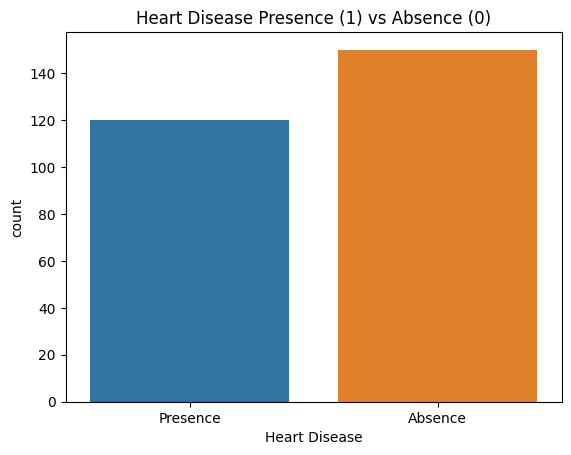

In [76]:
# Visualizing the distribution of heart disease presence (1) vs absence (0)
sns.countplot(x='Heart Disease', data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()


In [77]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Split Data into Features and Target

In [79]:
# Feature and target split
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']


## Step 4: Encode Categorical Variables (If Needed)

In [80]:



df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [87]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Heart Disease"])  # Assuming "target" is the label column
y = df["Heart Disease"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (216, 13)
Testing Data Shape: (54, 13)


## Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict
log_preds = log_model.predict(X_test)

# Evaluate
log_accuracy = accuracy_score(y_test, log_preds)
print("Logistic Regression Accuracy:", log_accuracy)


Logistic Regression Accuracy: 0.8518518518518519


## SVM

In [89]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train, y_train)

# Predict
svm_preds = svm_model.predict(X_test)

# Evaluate
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.8148148148148148


## Train Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
dt_preds = dt_model.predict(X_test)

# Evaluate
dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.7962962962962963


## Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

# Train GBM
gbm_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

# Predict
gbm_preds = gbm_model.predict(X_test)

# Evaluate
gbm_accuracy = accuracy_score(y_test, gbm_preds)
print("Gradient Boosting Accuracy:", gbm_accuracy)


Gradient Boosting Accuracy: 0.8148148148148148


## LightGBM (LGBM)

In [92]:
import lightgbm as lgb

# Train LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# Predict
lgb_preds = lgb_model.predict(X_test)

# Evaluate
lgb_accuracy = accuracy_score(y_test, lgb_preds)
print("LightGBM Accuracy:", lgb_accuracy)


[LightGBM] [Info] Number of positive: 96, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223144
[LightGBM] [Info] Start training from score -0.223144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## MultiLayer Perceptron

In [93]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_preds = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_preds)
print("MLP accuracy:", mlp_accuracy)

MLP accuracy: 0.8518518518518519


## Train Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8148148148148148


## Voting Classifier (Hard & Soft Voting)

In [95]:
from sklearn.ensemble import VotingClassifier

# Define base models
voting_clf = VotingClassifier(
    estimators=[
        ("Logistic Regression", log_model),
        ("SVM", svm_model),
        ("Random Forest", rf_model),
        ("MLP", mlp_model),
        ("GBM", gbm_model),
        ("Decision Trees", dt_model)
    ],
    voting="soft"  # Use "hard" for majority voting, "soft" for probability-based
)

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict
voting_preds = voting_clf.predict(X_test)

# Evaluate
voting_accuracy = accuracy_score(y_test, voting_preds)
print("Voting Classifier Accuracy:", voting_accuracy)


Voting Classifier Accuracy: 0.8333333333333334


## Stacking Classifier (Layered Learning)

In [98]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB  # Meta learner

# Define base models
base_models = [
    ("Logistic Regression", log_model),
    ##("SVM", svm_model),
    ##("Random Forest", rf_model),
    ("MLP", mlp_model),
    ("LightGBM", lgb_model)
    ##("GBM", gbm_model),
    ##("Decision Trees", dt_model)
]

# Define Stacking Model (using Naive Bayes as the final model)
stacking_clf = StackingClassifier(
    estimators=base_models, 
    final_estimator=GaussianNB()  # Meta-model that combines predictions
)

# Train Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predict
stacking_preds = stacking_clf.predict(X_test)

# Evaluate
stacking_accuracy = accuracy_score(y_test, stacking_preds)
print("Stacking Classifier Accuracy:", stacking_accuracy)


[LightGBM] [Info] Number of positive: 96, number of negative: 120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223144
[LightGBM] [Info] Start training from score -0.223144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## Compare Ensemble Methods with Other Models

                 Model  Accuracy
0  Logistic Regression  0.851852
5                  MLP  0.851852
8  Stacking Classifier  0.851852
4             LightGBM  0.833333
7    Voting Classifier  0.833333
1                  SVM  0.814815
3        Random Forest  0.814815
6                  GBM  0.814815
2        Decision Tree  0.796296


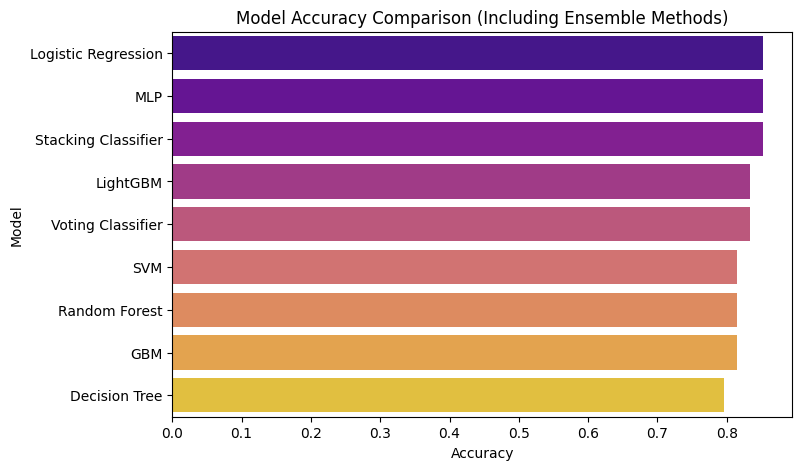

In [99]:
# Store model performance
ensemble_scores = {
    "Logistic Regression": log_accuracy,
    "SVM": svm_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "LightGBM": lgb_accuracy ,
    "MLP": mlp_accuracy,
    "GBM": gbm_accuracy,
    "Voting Classifier": voting_accuracy,
    "Stacking Classifier": stacking_accuracy
}

# Convert to DataFrame
ensemble_results_df = pd.DataFrame(ensemble_scores.items(), columns=["Model", "Accuracy"])
ensemble_results_df = ensemble_results_df.sort_values(by="Accuracy", ascending=False)

# Display Results
print(ensemble_results_df)

# Visualize results
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=ensemble_results_df, palette="plasma")
plt.title("Model Accuracy Comparison (Including Ensemble Methods)")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()
